In [2]:
import pandas as pd
import numpy as np
import pymysql
import time

In [5]:
closeeps = pd.read_csv('close&eps_171819.csv', low_memory=False).iloc[:, 2:]
closeeps['ticker'] = closeeps['tic'].apply(lambda x: '$' + str(x))
closeeps['created_time'] = closeeps['datadate'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
closeeps['rank'] = closeeps.groupby(closeeps['ticker'])['created_time'].rank()
closeeps['rank2'] = closeeps.apply(lambda x: x['rank'] + 5, axis=1)
close = pd.merge(closeeps, closeeps, left_on=['ticker', 'rank2'], right_on=['ticker', 'rank'], suffixes=['', '_r'])
close = close.loc[:, ['ticker', 'created_time', 'prccd', 'prccd_r']]
close = close.rename(columns={'cprccd_r': 'prccd' + str(5)})
close.columns = ['ticker', 'created_time', 'price', 'three_days_later']
close['change_in_5_days'] = (close.three_days_later - close.price)/close.price

In [6]:
close['target'] = pd.cut(x=close['change_in_5_days'], bins=[-float('inf'), -0.3, 0, 0.3, float('inf')], labels=['0', '1', '2','3'])

In [7]:
close.target = close.target.astype('category')

In [8]:
print(close.head())
print(close.shape)
close.to_csv('close5.csv',index = False)

  ticker created_time  price  three_days_later  change_in_5_days target
0   $AIR   2017-01-03  33.25             32.25         -0.030075      1
1   $AIR   2017-01-04  33.44             32.31         -0.033792      1
2   $AIR   2017-01-05  32.27             31.93         -0.010536      1
3   $AIR   2017-01-06  32.31             32.28         -0.000929      1
4   $AIR   2017-01-09  31.98             31.49         -0.015322      1
(1453837, 6)


In [9]:
close['target'].value_counts()

1    734285
2    718189
3      3631
0      2060
Name: target, dtype: int64

In [55]:
conn = pymysql.connect(host='localhost', user='root', password='Lmq19960916.', database='Twitter')
sqlcmd = "select* from clean2_train " 
'''+ "limit " + str(0) + "," + '200000'''
raw = pd.read_sql(sqlcmd, conn)
conn.close()

KeyboardInterrupt: 

In [ ]:
def concat_func(x):
    return pd.Series({
        'text':' '.join(x['text']),
    })
data_com = raw.groupby([raw['ticker'],raw['created_time']]).apply(concat_func).reset_index()

In [ ]:
# change the format of created time
data_com['created_time'] = data_com['created_time'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [ ]:
print(data_com.head())
print(data_com.shape)

In [ ]:
data_final =  pd.merge(data_com, close, how='left', on=['ticker','created_time'])
data_final = data_final.dropna()
print(data_final.head())
print(data_final.shape)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
start = time.time()

In [19]:
# uni-bigram tf_idf
cv = CountVectorizer(min_df=0.,max_df=1.,ngram_range=(1,1),max_features=10000)
tt = TfidfTransformer(norm='l2', use_idf=True)
cv_matrix = cv.fit_transform(data_final.text).toarray()
tt_matrix=tt.fit_transform(cv_matrix).toarray()
vocab=cv.get_feature_names()
uni_tf_idf = pd.DataFrame(np.round(tt_matrix,2),columns= vocab)

In [20]:
print(uni_tf_idf.head())
print(uni_tf_idf.shape)

    aa  aaron   ab  abc  aberdeen  ability  able  abortion  abraham  abroad  \
0  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
1  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
2  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
3  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
4  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   

   ...  zealand  zen  zero  zimbabwe  zinc  zip  zone  zones  zoo  zoom  
0  ...      0.0  0.0   0.0       0.0   0.0  0.0   0.0    0.0  0.0   0.0  
1  ...      0.0  0.0   0.0       0.0   0.0  0.0   0.0    0.0  0.0   0.0  
2  ...      0.0  0.0   0.0       0.0   0.0  0.0   0.0    0.0  0.0   0.0  
3  ...      0.0  0.0   0.0       0.0   0.0  0.0   0.0    0.0  0.0   0.0  
4  ...      0.0  0.0   0.0       0.0   0.0  0.0   0.0    0.0  0.0   0.0  

[5 rows x 6784 columns]
(9475, 6784)


In [24]:
cv = CountVectorizer(min_df=0.,max_df=1.,ngram_range=(2,2), max_features=30000)
tt = TfidfTransformer(norm='l2', use_idf=True)
cv_matrix = cv.fit_transform(data_final.text).toarray()
tt_matrix=tt.fit_transform(cv_matrix).toarray()
vocab=cv.get_feature_names()
bi_tf_idf = pd.DataFrame(np.round(tt_matrix,2),columns= vocab)
print(bi_tf_idf.head())
print(bi_tf_idf.shape)

   able buy  absolutely nothing  academic algorithms  accept neo  \
0       0.0                 0.0                  0.0         0.0   
1       0.0                 0.0                  0.0         0.0   
2       0.0                 0.0                  0.0         0.0   
3       0.0                 0.0                  0.0         0.0   
4       0.0                 0.0                  0.0         0.0   

   accept payment  access halo  account neo  account sp  accurate estimate  \
0             0.0          0.0          0.0         0.0                0.0   
1             0.0          0.0          0.0         0.0                0.0   
2             0.0          0.0          0.0         0.0                0.0   
3             0.0          0.0          0.0         0.0                0.0   
4             0.0          0.0          0.0         0.0                0.0   

   accurate signal  ...  zen sc  zen seq  zen shift  zen start  zen swift  \
0              0.0  ...     0.0      0.0     

In [23]:
bigram_list = pd.read_csv('bigram.csv').bigram
bi_tf_idf = bi_tf_idf.loc[:, bi_tf_idf.columns.isin(bigram_list)]
print(bi_tf_idf.head())
print(bi_tf_idf.shape)

   account sp  accurate estimate  acm info  acquire asset  acquire capital  \
0         0.0                0.0       0.0            0.0              0.0   
1         0.0                0.0       0.0            0.0              0.0   
2         0.0                0.0       0.0            0.0              0.0   
3         0.0                0.0       0.0            0.0              0.0   
4         0.0                0.0       0.0            0.0              0.0   

   acquire investment  acquire new  acquire russell  acquire share  \
0                 0.0          0.0              0.0            0.0   
1                 0.0          0.0              0.0            0.0   
2                 0.0          0.0              0.0            0.0   
3                 0.0          0.0              0.0            0.0   
4                 0.0          0.0              0.0            0.0   

   acquire shares  ...  yesterday high  yesterday join  yesterday today  \
0             0.0  ...             

In [25]:
result = pd.concat([uni_tf_idf, bi_tf_idf], axis=1)

In [26]:
#result = uni_bi_tf_idf
print(result.head())
print(result.shape)

    aa  aaron   ab  abc  aberdeen  ability  able  abortion  abraham  abroad  \
0  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
1  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
2  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
3  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   
4  0.0    0.0  0.0  0.0       0.0      0.0   0.0       0.0      0.0     0.0   

   ...  zen sc  zen seq  zen shift  zen start  zen swift  zen trading  \
0  ...     0.0      0.0        0.0        0.0        0.0          0.0   
1  ...     0.0      0.0        0.0        0.0        0.0          0.0   
2  ...     0.0      0.0        0.0        0.0        0.0          0.0   
3  ...     0.0      0.0        0.0        0.0        0.0          0.0   
4  ...     0.0      0.0        0.0        0.0        0.0          0.0   

   zero emission  zero indicate  zone neo  zone sell  
0            0.0            0.0

In [27]:
end = time.time()
print('It takes {} minutes to do countvectorizier.'.format((end - start)/60))

It takes 5.054700648784637 minutes to do countvectorizier.


In [ ]:
#result = uni_tf_idf

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [29]:
# dimension reduction

start = time.time()

pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(result.values)
principalDf = pd.DataFrame(data = principalComponents)

end = time.time()
print('It takes {} minutes to do PCA.'.format((end - start)/60))

It takes 9.059156382083893 minutes to do PCA.


In [30]:
print(principalDf.head())
print(principalDf.shape)
print(sum(pca.explained_variance_ratio_))

       0         1         2         3         4         5         6     \
0 -0.034050  0.009284  0.015514  0.020859 -0.030377 -0.037192  0.003657   
1 -0.035418  0.002012  0.011987  0.002392 -0.115053 -0.166244  0.072865   
2 -0.037394  0.017523  0.027901  0.059668 -0.055223 -0.073083  0.032272   
3 -0.008006  0.004881 -0.003318 -0.011693 -0.037877 -0.042202  0.012093   
4 -0.017780  0.016135  0.012446  0.012472 -0.044089 -0.051348  0.019725   

       7         8         9     ...      4149      4150      4151      4152  \
0  0.017600 -0.023658 -0.020614  ...  0.019386 -0.005686 -0.005773 -0.002632   
1 -0.123815  0.041583  0.062739  ... -0.008684  0.008125  0.005092 -0.008205   
2  0.007321 -0.047842  0.030926  ...  0.003672 -0.001935 -0.000443  0.006332   
3  0.023065 -0.038784 -0.017642  ...  0.005688 -0.011280  0.008045 -0.001379   
4  0.038259 -0.042451 -0.028456  ... -0.004480 -0.005673  0.002086 -0.018368   

       4153      4154      4155      4156      4157      4158  
0 -0

In [31]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(principalDf.dropna(), data_final[['target']], test_size = 0.25)

In [32]:
finalDf = pd.concat([principalDf, data_final[['target']]], axis = 1)
finalDf = finalDf.dropna()
print(finalDf.shape)
print(finalDf.head())

(6756, 4160)
           0         1         2         3         4         5         6  \
17 -0.008167 -0.045697 -0.024222  0.020930 -0.078528  0.052889  0.032850   
18 -0.010060 -0.022448 -0.012506 -0.028760 -0.065346 -0.080450  0.027483   
22 -0.005673 -0.061781 -0.029469  0.020153  0.005150 -0.014381 -0.041584   
23 -0.021017 -0.006826  0.014818  0.040401 -0.022898 -0.032616  0.000049   
24 -0.026169  0.003456  0.018285  0.013802 -0.003007 -0.047604  0.080763   

           7         8         9  ...      4150      4151      4152      4153  \
17 -0.044542  0.026906  0.012174  ...  0.005565  0.014951 -0.004073 -0.004396   
18 -0.041892 -0.008813  0.007651  ... -0.003815 -0.006412  0.006637  0.008242   
22 -0.075160  0.045108 -0.006792  ...  0.024791  0.021971 -0.003071 -0.008639   
23 -0.030429 -0.004382 -0.022980  ... -0.003195 -0.013042 -0.008018 -0.001367   
24  0.011121 -0.039744 -0.025422  ... -0.007246  0.005028  0.003934 -0.000646   

        4154      4155      4156      4157 

In [33]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators = 100)   
clf.fit(train_features, train_labels) 

/Users/louise/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
print('train_score: ', clf.score(train_features, train_labels))
print('test_score: ', clf.score(test_features, test_labels))

train_score:  0.995778215592457
test_score:  0.5238497256226256


In [39]:
from sklearn import metrics

In [42]:
y_pred = clf.predict(test_features)
y_true = test_labels

In [37]:
np.sqrt(metrics.mean_squared_error(test_labels, y_pred))

0.6927837654820527

In [51]:
metrics.recall_score(y_true, y_pred,average='weighted')

0.5238497256226256

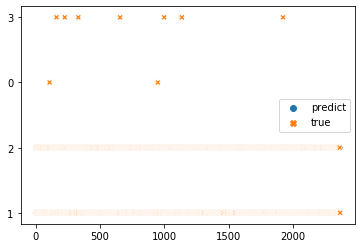

In [47]:
import seaborn as sns
df_plot = pd.DataFrame()
df_plot['predict'] = clf.predict(test_features)
df_plot['true'] = test_labels.values
sns.scatterplot(data = df_plot)

In [ ]:
# rondam forest regressor

start = time.time()

from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(train_features, train_labels) 

end = time.time()
print('It takes {} minutes to do regressor.'.format((end - start)/60))

print('train_score: ', regressor.score(train_features, train_labels))
print('test_score: ', regressor.score(test_features, test_labels))

predict = regressor.predict(test_features).tolist()
true = test_labels


In [ ]:
# only keep words with top 75% frequency
'''
result_t = uni_tf_idf.T
result_t['mean_value'] = result_t.mean(axis = 1)
percentile75 = result_t.mean_value.describe()[6]
df_try = result_t.drop(result_t[(result_t.mean_value < percentile75)].index)
df_try = df_try[df_try.columns[:-1]]
result = df_try.T
'''